Run the following line if you don't have any of the libraries

In [ ]:
# %%bash
# pip install statsmodels pandas numpy

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

import data_prep
import eval_utils
from eval_utils import build_and_model_VAR

In [3]:
data_prep.get_lagged("./data/XLE_energy_etf.csv", n=3).tail()

,Open,High,Low,Close,Adj Close,Volume,Adj Close_1,Adj Close_2,Adj Close_3
Date,,,,,,,,,
2020-03-16,27.950001,31.120001,27.670000,27.809999,27.809999,40233600,32.189999,29.469999,33.669998
2020-03-17,28.080000,29.180000,26.950001,28.000000,28.000000,45443600,27.809999,32.189999,29.469999
2020-03-18,26.040001,26.580000,22.879999,23.980000,23.980000,52135800,28.000000,27.809999,32.189999
2020-03-19,24.330000,25.709999,22.980000,25.610001,25.610001,52226500,23.980000,28.000000,27.809999
2020-03-20,26.260000,26.840000,24.760000,25.860001,25.860001,58313200,25.610001,23.980000,28.000000


In [4]:
pd.read_csv("./data/SnP_500.csv", index_col="Date").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


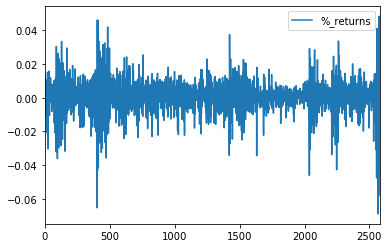

In [5]:
df_perc_returns = data_prep.get_perc_return("./data/SnP_500.csv", column_name="Open")
df_perc_returns.plot()

The way returns are distributed shows a stationary process with no correlation with time 
This also leads us to try out GARCH models since we proabably can model these spikes in volatility.

Following which, we'll look at the full dataset, a concatnation of all the variables together with S&P500

In [6]:
full_industries = ["Pharm", "Semicon", "Industrial", "Energy", "Financial", "Tech", "Utilities", "Consumer"]
df, idx_psuedo_OOB, idx_OOB = data_prep.split_data("./data/output.csv")
full_df = pd.read_csv("./data/output.csv")
full_df = full_df.set_index("Date")

t = build_and_model_VAR(df, full_industries)
t

,Adj Close_Pharm,Volume_Pharm,Adj Close_Semicon,Volume_Semicon,Adj Close_Industrial,Volume_Industrial,Adj Close_Energy,Volume_Energy,Adj Close_Financial,Volume_Financial,Adj Close_Tech,Volume_Tech,Adj Close_Utilities,Volume_Utilities,Adj Close_Consumer,Volume_Consumer,Adj Close_SNP500,Volume_SNP500
Date,,,,,,,,,,,,,,,,,,
4/1/2010,-0.015450,500600,0.000000,12679000,0.121133,55300,1.337844,20009900,1.045284,162650700,0.043401,12167700,0.541733,6426800,0.119717,7620900,0.441644,4298910000
5/1/2010,0.536562,18800,-0.031617,2033900,0.376432,27600,0.503858,11121400,0.449035,66024100,-0.227089,14927500,-0.467168,7193800,-0.064129,2687600,0.265151,3505080000
6/1/2010,1.249080,16400,0.977934,1148100,0.816670,571400,0.639237,10844100,0.703183,50421300,0.873890,8177000,0.294376,7856800,0.808171,6192300,0.799854,3238690000
7/1/2010,-0.837922,69800,-2.192202,3392200,-1.932548,261000,-2.041514,18977300,-1.208479,63257800,-1.553905,13059200,0.570200,17635700,-1.334539,6557000,-1.324856,4188590000
8/1/2010,0.915656,45200,-0.661596,2835000,-0.200104,95500,0.196063,17445500,0.044139,48512900,0.050617,13518000,-1.178113,15646000,0.740619,8362700,0.197388,3983600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/6/2019,-2.722026,686600,-0.592517,14581600,-2.821312,29700,-3.307980,35039400,-3.167062,158558700,-2.124984,16506900,-2.031095,14075500,-2.638847,11124000,-2.670549,4586370000
25/6/2019,0.191134,18000,1.276376,461900,1.386932,81000,1.122118,8434900,1.161625,40325800,1.196105,5714600,0.351488,6507800,0.886610,4365200,0.999288,3102780000
26/6/2019,-0.223198,52100,-0.746845,1037200,-0.507608,57700,-0.439487,9998300,-1.022594,38428600,-0.718702,8562700,-1.153127,13414500,-1.000450,2558400,-0.654501,2882830000


Columns are laballed as such:  VARIABLE_SECTOR

In [ ]:
SNP_daily_ret = (df['Adj Close_SNP500']/df['Adj Close_SNP500'].shift(1)) - 1
SNP_daily_ret = SNP_daily_ret.dropna()

In [ ]:
mod = AutoReg(SNP_daily_ret, 1)
res = mod.fit()
res.summary()

In [ ]:
plot_acf(SNP_daily_ret, lags=30)
plt.show()
plot_pacf(SNP_daily_ret, lags=30)
plt.show()

The ACF shows that after lags of t=2, autocorrelation stays near 0 which means a **MA(2)** model

The PACF shows that after lags of t=2, autocorrelation stays near 0 which means an **AR(2)** model

In [ ]:
mod = AutoReg(SNP_daily_ret, 2)
res = mod.fit()
res.summary()

In [ ]:
ar2 = ARMA(SNP_daily_ret, order=[2,0])
ar2_fit = ar2.fit(disp=0)
print (ar2_fit.summary())
print('\n')

ma2 = ARMA(SNP_daily_ret, order=[0,2])
ma2_fit = ma2.fit(disp=0)
print (ma2_fit.summary())
print('\n')

arma11 = ARMA(SNP_daily_ret, order=[1,1])
arma11_fit = arma11.fit(disp=0)
print (arma11_fit.summary())
print('\n')


AIC values for all the models are extremely similar and hence we look to BIC to decide the best model()

It seems like AR(2) does the best out of all the models.

However, as shown later, adding MA(q) to AR(2) to eliminate autocorrelations yields higher AIC than ARMA(1,1).

In [ ]:
## some usful attributes that might be used in future
"""
arma22_fit.aic
arma22_fit.bic
arma22_fit.fittedvalues  ## return fitted values of the model
arma22_fit.predict(start=2568, end=2570)
"""

In [ ]:
plot_acf(ar2_fit.fittedvalues)

2 lags are present in AR(2) model so we try to fit ARMA(2,2) to rid of the autocorrelations.

In [ ]:
arma22 = ARMA(SNP_daily_ret, order=[2,2])
arma22_fit = arma22.fit(disp=0)
print (arma22_fit.summary())
print('\n')

AIC at -15529.724 is marginally lower than AR(2).

So far, our benchmarked models are:
- AR(2)
- ARMA(1,1)
- ARMA(2,2)

Moving on, we add more variables, to build ADL models that would hopefully beat our benchmark models

We'll start from one industry, build ARMA for models with lags $\in (1,5)$ and then look at their BIC values 

**Note:** we chose lags from 1 to 5 because 5 represents 1 trading week and we want to quickly be able to spot changes

We then choose the lagged_model with lowest BIC (BIC tend to give parsimonous model hence it would better fit our needs to prevent too many variables in our models to prevent overfitting) and iteratively add more industries up to the full model

Afterwords, we rid insignificant variables based on their t-stat. We do this iteratively with the final model till all the variables are significant. 

We note that this method may not be the best method since we didn't cover the full subset to see the lowest AIC/BIC but that is too computationally expensive.

By sampling 50 subsets of **n** variables, it will cover a signiicant subset and such iterative addition of variables is generally accepted in statistics.

In [ ]:
## Adding more variables
from statsmodels.tsa.api import VAR
from statsmodels.regression.linear_model import OLS

# lagged_df_exog(industries=["Pharm","Utilities"], col2lag=list(pharm_utils.columns))
def lagged_df_exog(industries:list, target="Open_SNP500", method="ARMA", order=[2,0], remove_vars=[]):
    temp_df = eval_utils.build_and_model_VAR(df, industries)
    y = data_prep.get_perc_return_df(temp_df[target])
    y = y[order[0]:]
    temp_df = temp_df.drop("Open_SNP500", axis=1)
    og = temp_df.columns 
    temp_df = data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=order[0])  ## lags every single var
    
    X_lagged = temp_df.drop(og, axis=1)
    if len(remove_vars) != 0:
        for colname in remove_vars:
            X_lagged = X_lagged.drop(colname, axis=1)
    
    if method == "ARMA":
        model = ARMA(y, order=order, exog=X_lagged)
    elif method == "OLS":
        model = OLS(y, X_lagged)
    else:
        raise Exception("method has to be 'ARMA' or 'OLS'.")
        
    results = model.fit()
    return results

full_industries = ["Pharm", "Semicon", "Industrial", "Energy", "Financial", "Tech", "Utilities", "Consumer"]
def best_lagged_model(industries:list, max_p_lag:int, max_q_lag=0, method="ARMA", start_ic=0, ic_method="BIC", print_summ=False):
    info = []
    ic = start_ic
    for p in range(1, max_p_lag+1):
        for q in range(max_q_lag+1):
            # q can be 0 but p has to be min 1
            try:
                temp_res = lagged_df_exog(industries=industries, order=[p,q])
                if print_summ:
                    print(temp_res.summary())
            except Exception:
                print(Exception)
                continue
            
            ## maybe can append ARMAResults into some global list.
            t = {
                    "order": [p,q],
                    "params": dict(temp_res.params),
                    "aic": temp_res.aic,
                    "bic": temp_res.bic,
                }
            info.append(t)
            if ic_method == "BIC":
                temp_ic = temp_res.bic
            elif ic_method == "AIC":
                temp_ic = temp_res.aic
            else:
                raise Exception("ic_method argument has to be 'BIC' or 'AIC'.")
            if ic == 0:  ## first iteration only
                ic = temp_ic
                res = temp_res
            elif temp_ic < ic:
                ic = temp_ic
                res = temp_res
    ## res will have the lowest ic. 
    ## info will be a list of dictionary
    return res, info

We look at the full model first and find the best lag for the full model.

In [ ]:
res_full, info = best_lagged_model(full_industries, max_p_lag=5, max_q_lag=3, print_summ=True)

In [ ]:
import json
with open('./arma_adl_full.json', 'w') as fout:
    json.dump(info , fout)
    
## To load it:
with open('./arma_adl_full.json', 'r') as fin:
    info = json.load(fin)  ## a list of fict

print(info)
## Note: Order of lowest AIC can be derived from info.

In [ ]:
print(res_full.summary())

Seems like **ARMA(4,0)** fits the full model the best.

The full model has some variables where p-values are not significant. We remove some of those that have the highest p-values (> 0.5). And recompute the ARMA model after removing those variables.

In [ ]:
data_prep.get_perc_return_df(build_and_model_VAR(df, full_industries)["Open_SNP500"])

In [ ]:
to_remove = ["Volume_Pharm_L2", "Volume_Semicon_L3", "Volume_Industrial_L3", "Volume_Tech_L2", "Volume_Utilities_L2", "Volume_Utilities_L3", "Volume_Consumer_L3", "Open_Industrial_L2", "Open_Pharm_L1"]
res_full2 = lagged_df_exog(full_industries, order=[4,0], remove_vars=to_remove)
print(res_full2.summary())

**Evaluation:**

Looking at the AIC's and BIC's of all of the models being compared to determine the best ARMA+exogeneous variables, it seems like adding MA components increases AIC and BIC, hence ARMA(4,0)+exogeneous variables is the best model in the subset of models. There might be some correlation between the endogeneous variables and exogeneous variables, and not much random error. Hence, adding random errors actually lowers the effectiveness of the model in predicting daily percentage change in SNP500.

Let's take variable `res_full2` as the final model for ARMA with exogeneous variables. This models behaves similar to an ADL model, since there are no lags. involved.

In [ ]:
## lag the variables in psuedo_OOB
lagged_fulldf = build_and_model_VAR(full_df, full_industries)
y_val = lagged_fulldf["Open_SNP500"]
lagged_fulldf = lagged_fulldf.drop("Open_SNP500", axis=1)
lagged_fulldf = data_prep.get_lagged_df(lagged_fulldf,col2lag=list(lagged_fulldf.columns), n=4)
psuedo_OOB = lagged_fulldf[list(res_full2.params.keys()[1:-4])].iloc[idx_psuedo_OOB:idx_OOB]

In [ ]:
psuedo_OOB = lagged_fulldf[list(res_full2.params.keys()[1:-4])].iloc[idx_psuedo_OOB-4+1:idx_OOB-4+1]
res_full2.k_ar

In [ ]:
var_to_drop = to_remove + ["Open_SNP500"]
print(idx_psuedo_OOB)
print(idx_OOB)
steps = idx_OOB-idx_psuedo_OOB

exog_data = psuedo_OOB.iloc[:5].reset_index(drop=True)
res2 = list(res_full2.forecast(steps=5, exog=exog_data))
print(res2)
nice_result = {
    "forecast": res2[0].tolist(),
    "sd": res2[1].tolist(),
    "conf interval": res2[2].tolist(),
}
nice_result

In [ ]:
lagged_fulldf.shape

In [ ]:
import eval_utils
## full_df is the output.csv after setting "Date" to be index
res_function = eval_utils.forecast_ARMA_ADL(full_df, model=res_full2, start_idx=idx_psuedo_OOB, end_idx=idx_OOB) 

In [ ]:
y_val.iloc[idx_psuedo_OOB:idx_OOB+1]
y_perc = data_prep.get_perc_return_df(y_val.iloc[idx_psuedo_OOB-1:idx_OOB+1]).dropna()

In [ ]:
y_pred = res_function['forecast']
plt.plot(y_pred)
plt.plot(y_perc)

In [ ]:
eval_utils.predicted_views(y_val.iloc[idx_psuedo_OOB-1:idx_OOB+1], y_pred)

### Extras

In [ ]:
pharm_utils = build_and_model_VAR(df, ["Pharm","Utilities"])
data_prep.get_lagged_df(pharm_utils,col2lag=list(pharm_utils.columns), n=3)

In [ ]:
print(res.aic)
print(res.bic)
print(res.fittedvalues[-10:])

"""
If the model is an ARMAX and out-of-sample forecasting is requested, exog must be given. 
exog must be aligned so that exog[0] is used to produce the first out-of-sample forecast.
"""
# print(res.predict(start=2568, end=2570))

res.summary()

In [ ]:
df.columns